# MNIST Dataset
So the MNIST data set has got
60,000 images of handwritten digits.
Here's a smattering of them.
And we can use this training set to learn a __classifier__:
a function that takes an image and then outputs
what digit it thinks it is.

MNIST also has a separate test set of 10,000 images
along with their labels, and we can use this test set
to assess how good our classifier really is.

We'll use the munpy function _load_ to get the saved file. If the file is a [.npy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.load.html) file, then a single array is returned.

In [2]:
import numpy as np

train_data = np.load('./MNIST/train_data.npy')

In [7]:
print(type(train_data))
print(len(train_data))

<class 'numpy.ndarray'>
7500


In [8]:
train_labels = np.load('./MNIST/train_labels.npy')
test_data = np.load('./MNIST/test_data.npy')
test_labels = np.load('./MNIST/test_labels.npy')

So what kind of classifiers might we try?
Well, the simplest one imaginable perhaps,
is __Nearest Neighbor__
.
What happens in this case is that
when we get a new image to classify,
say this one over here, we get some new image X.
We go through our training set of 60,000 images
and we find the one that's closest to X.
Then we simply return the label of that image.
That's it.

Now, there are some details that we have to work out.
If we are looking for the one that's closest to X,
it means we have some notion of __distance between images__.
How are we representing images on the computer anyway?

So let's look into that.
So first off, we will __represent images as vectors__, okay?
Now an MNIST image is 28 pixels by 28.
So it's 28 pixels across, 28 pixels high.
That means the total number of pixels
is 28 and 28 which is 784.
And each pixel is grayscale.
So it's a value in the range zero to 255
where _zero means black and 255 means white_.

In [9]:
print(train_data[0])
print(len(train_data[0]))

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

## Visualizing the data

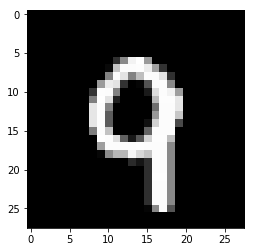

In [15]:
# Let's visualize it
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_data[0].reshape(28,28),cmap='gray')

Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image.

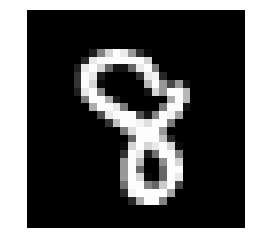

Label 8


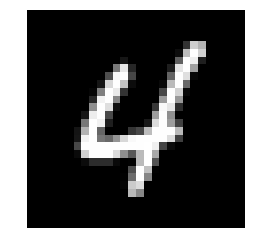

Label 4


In [14]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") 
## and displays that image.
def vis_image(index, dataset='train'):
    if(dataset=='train'):
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print('Label ' + str(label))
    return

vis_image(100,'train')
vis_image(100,'test')

In [16]:
# Print out their dimensions
print('Training dataset dimensions: ', np.shape(train_data))
print('Number of training labels: ', len(train_labels))
print('Testing dataset dimensions: ', np.shape(test_data))
print('Number of testing labels: ', len(test_labels))


Training dataset dimensions:  (7500, 784)
Number of training labels:  7500
Testing dataset dimensions:  (1000, 784)
Number of testing labels:  1000


In [17]:
# Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print('Training set distribution: ')
print(dict(zip(train_digits,train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print('Test set distribution: ')
print(dict(zip(test_digits,test_counts)))

Training set distribution: 
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test set distribution: 
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


So we've taken the image and converted it into
a 784 dimensional vector.
Our data space then, which we're gonna denote by script X
is 784 dimensional Euclidean space
and we'll often write it like this: R to the 784th.

The label space just consists of
the possible labels, zero to nine.
Now that we have a specific vector representation,
we also have to decide how we're going to compute distances
between vectors and the most common, or default distance
function is perhaps just Euclidean distance.
So let's recall how this works in two dimensions.
When you have two points, the Euclidean distance
between them is just the length of the line connecting them.
So it's the length of this line.
And what is that length?

Well, if you look at these two points, X and Z,
along the first coordinate, they defer by two
and along the second coordinate, they defer by three.
So the length of the line, the distance from X to Z
is simply the square root of two squared plus three squared
which is the square root of 13.
That's the Euclidean distance between X and Z
in two dimensions, okay?

Now of course we aren't working in two dimensions.
We're working in a much higher dimensional space
but the basic idea is the same.
When you want to compute the distance
between two vectors, X and Z, you simply find out
how much they differ on each individual coordinate,
you square these values, you add them up
and then you take the square root of the whole thing.
That's Euclidean distance.

So now we have a representation of the images
as vectors in 784 dimensional space
and we have a distance function between images.
So we're ready to use __nearest neighbor__.
Each time we get a new image,
we simply _find its nearest neighbor
using Euclidean distance in 784 dimensional space
and we return the __label__ of this training image_.

#### So how good is this classifier?

Well, let's look at some numbers.
First of all, what is the __error rate__
of the classifier on the training points?
So we have these 60,000 training images.
For any training point, its nearest neighbor
in the training set is itself.
So it'll definitely get the right label.
So the error rate on the training set is zero.
What that means is that training error
is not a good predictor of future performance.
It in general is something that is overly optimistic.
That's why we have a separate test set.

If we compute the error on those separate 10,000 points,
that's really a much better indication
of how well this classifier is gonna perform in practice.

Now, what kind of test error might we expect?
Well, let's do a little tore experiment.
Suppose that we use the classifier
that was completely random.
When it was given an image, it didn't even look at the image
but just randomly chose a number from zero to nine.
What would be the error rate of a classifier like this?
Well, whatever the correct label is,
the chance that it randomly picks
that correct label is 10%.
So a random classifier has got an error rate of 90%.
We certainly want to do better than that.
Now let's see how well nearest neighbor does.
<img src = 'acc_1.png' width=75%>
That means that out of the 10,000 points,
it gets 309 of them wrong.
That's not too bad for such a simple method.
Let's look at some of the mistakes that it makes.
This query, for example.
<img src = 'acc_2.png' width=75%>
And these are some examples of the mistakes that it made.
How can we improve its performance even further?

Let's look at two standard ways of doing this.

- The first is to move to K-nearest neighbors and the second is to look for better distance functions.
    So K-nearest neighbor classification, this is a very simple idea.
    When doing nearest neighbor, instead of simply looking for the very closest 
    point in the test set. Find the closest three points, or the closest five
    points.They each have a label. Return the majority label, or the most common
    label.
    
Let's see how this does on MNIST.
<img src = 'acc_3.png' width=75%>
So, when K equals one, this is just
the same nearest neighbor classifier we saw last time.
And it has an error rate of 3.09%.
When K equals three what we're doing in order to classify
a new image is finding it's three closest images
in the training set.
And returning their majority label.
If we do this, the error rate goes down slightly,
to 2.49%.
When we try larger values of K,
five, seven, nine, and so on,
the error rate starts going up again.
Okay?

Now one thing that's important to mention over here,
is that these errors are measured on the separate test set.
Measuring errors on the training set is really a very
poor indication of future performance.
So on this particular data set, varying K
helps a little bit, but not dramatically.
In other cases, it sometimes helps a lot.
But how do we choose the right value of K?
In this toy example we had a separate test set,
but that's not something we typically have in real life.
We'd only have the training set
and we've already made it clear
that error on the training set is
rather a poor indication of error in practice.
How do we deal with this?
This is a rather tricky problem.

And it's a problem that's not limited to nearest neighbor.
This is something we see over and over again
in machine learning.
Many of the methods we study will have parameters,
like K, that need to be set correctly.
If we set them well, the method works well.
If we set them poorly, the method works poorly.
And we have to somehow set them
using the training set alone.
A standard way of doing this is by
something called cross-validation.
So let me show you how this works for K-nearest neighbor.
Suppose we want to evaluate a particular choice of K.
<img src = 'acc_4.png' width=75%>
Now of course, we will want to experiment
with multiple values of K.
We'll try K equals one, K equals three, K equals five
and so on, and in each case,
for each of these values of K, we'll run
10-fold cross-validation, we'll get an error estimate
and then we'll pick the K with the lowest error estimate,
and that's how we find the K-nearest neighbor.

## Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance. The following function does so.

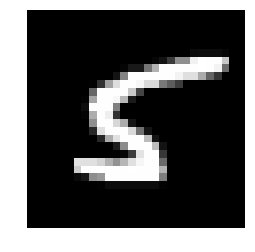

Label 5


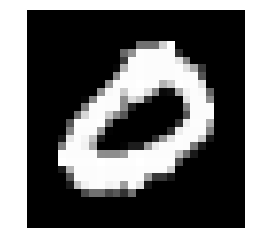

Label 0


In [18]:
# Computes squared Euclidean distance between two vectors.
def squared_dist(x,y):
    return np.sum(np.square(x-y))
    
# Take two vectors from the train_data
vis_image(39,'train')
vis_image(99,'train')

In [21]:
# Compute distance between them
print('Distance from 5 to 0: ', squared_dist(train_data[39,],train_data[99,]))

Distance from 5 to 0:  7.19534e+06


In [35]:
train_data[39,].shape

(784,)

## Computing nearest neighbours

Now that we have a distance function defined, we can now turn to nearest neighbour classification

In [36]:
## Takes a vector x and returns the index of its nearest neighbour in train_data
def find_NN(x):
    # Compute distances from x to every row in train_data
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return np.argmin(distances)

# Takes a vector x and returns the class of its nearest neighbours in train_data
def NN_classifier(x):
    # Get the index of the nearest neighbour
    index = find_NN(x)
    # print(index)
    # Return its class
    return train_labels[index]

## Examples

A success case:
NN classification: 0
True label:  0
The test label:  0
The test image:


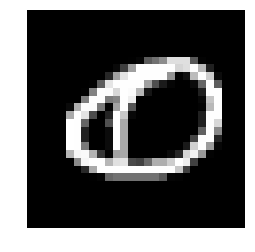

Label 0
The corresponding nearest neighbour image:


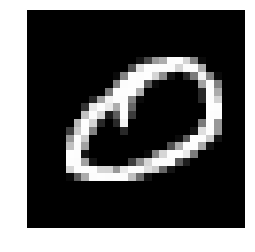

Label 0


In [25]:
# A success case
print('A success case:')
print('NN classification:', NN_classifier(test_data[0,]))
print('True label: ', test_labels[0])
print('The test label: ', test_labels[0])
print('The test image:')
vis_image(0,'test')
print('The corresponding nearest neighbour image:')
vis_image(find_NN(test_data[0,]),'train')

A failure case:
NN classification:  2
True label:  3
The test image:


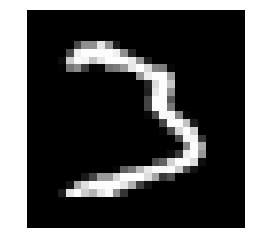

Label 3
The corresponding nearest neighbor image:


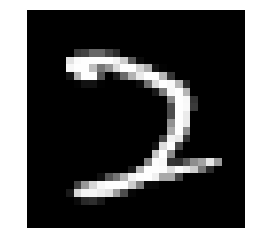

Label 2


In [26]:
## A failure case:
print("A failure case:")
print("NN classification: ", NN_classifier(test_data[39,]))
print("True label: ", test_labels[39])
print("The test image:")
vis_image(39, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[39,]), "train")

## 6. Processing the full test set

Now let's apply our nearest neighbor classifier over the full data set.

Note that to classify each test point, our code takes a full pass over each of the 7500 training examples. Thus we should not expect testing to be very fast. The following code takes about 100-150 seconds on 2.6 GHz Intel Core i5.

In [28]:
## Predict on each test data point (and time it)
t_before = time.time()
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)


print("Error of nearest neighbor classifier: ", error)
print("Classification time (seconds): ", t_after - t_before)

Error of nearest neighbor classifier:  0.046
Classification time (seconds):  102.36734628677368


## Faster nearest neighbours methods

Performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify a single point. If there are $N$ training points in $\mathbb{R}^d$, this takes $O(N d)$ time.

Fortunately, there are faster methods to perform nearest neighbor look up if we are willing to spend some time preprocessing the training set. `scikit-learn` has fast implementations of two useful nearest neighbor data structures: the _ball tree_ and the _k-d tree_.

In [29]:
from sklearn.neighbors import BallTree

## Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("Ball tree produces same predictions as above? ", 
      np.array_equal(test_predictions, ball_tree_predictions))

Time to build data structure (seconds):  0.8019440174102783
Time to classify test set (seconds):  7.288890838623047
Ball tree produces same predictions as above?  True


In [30]:
from sklearn.neighbors import KDTree

## Build nearest neighbor structure on training data
t_before = time.time()
kd_tree = KDTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("KD tree produces same predictions as above? ", 
      np.array_equal(test_predictions, kd_tree_predictions))

Time to build data structure (seconds):  0.7470002174377441
Time to classify test set (seconds):  9.432940244674683
KD tree produces same predictions as above?  True
